In [2]:
 import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import os

sns.set()

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

---

## A. 測試Dense Layer I/O, 並以Dense Layer建立模型。

### Sequential model: Logistic Regression

In [4]:
rand_data = np.random.normal(0, 1, (5, 3))  # normal分佈的亂數資料當input,
# 5個樣本，每個樣本有3個特徵

In [5]:
rand_data.shape

(5, 3)

In [18]:
model = Sequential()
model.add(
    Dense(, input_shape=(3,), activation="sigmoid")
)

# model.summary()

out = model.predict(rand_data)

print(out)

1/1 [==============================] - 0s 32ms/step
[[0.652791  ]
 [0.74544585]
 [0.7794974 ]
 [0.04668165]
 [0.8402151 ]]


In [ ]:

# 模型加入只有一個神經元的Dense層，且用sigmoid啟用，輸出機率

model.predict(rand_data)  # 應該會回傳5個介於0和1之間的數值。分別為各樣本的預測機率

[回到頂部](#%E7%9B%AE%E6%A8%99%EF%BC%9A)

---

### Sequential model: Softmax Regression

In [29]:
randData=np.random.normal(0,1,(5,3))         # normal分佈的亂數資料當input, 5個樣本，每個樣本有3個特徵

model = Sequential()
model.add(Dense(3,input_shape=(3,), activation='softmax') )   # 定義3個神經元，並以Softmax啟用，輸出機率
print( model.predict(randData) )             # 往前傳遞


1/1 [==============================] - 0s 35ms/step
[[0.4171205  0.5298336  0.05304592]
 [0.42832187 0.43775266 0.1339255 ]
 [0.4964632  0.40616518 0.09737156]
 [0.45883098 0.49385267 0.0473164 ]
 [0.05281707 0.04979647 0.89738643]]


In [30]:
print( model.predict(randData).sum(axis=1) ) # 驗證softmax輸出：P_A+P_B+P_C=1

1/1 [==============================] - 0s 17ms/step
[1.        1.        1.        1.0000001 1.       ]


[回到頂部](#%E7%9B%AE%E6%A8%99%EF%BC%9A)

---

### 練習：建立Multilayer Perceptron的模型，並且將$X_{new}$, $y_{new}$丟進去做訓練。

In [31]:
X = np.zeros((90,3))
for j in range(0,30):
    X[j,:] = 0.
for j in range(30,60):
    X[j,:] = 1.
for j in range(60,90):
    X[j,:] = 2.
y = X[:,0]

# # data standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X_new = scaler.transform(X)

# # convert y into one-hot representation
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y)

# print("X_new=\n",X_new)
# print()
# print("y_new=\n",y_new)

---

Epoch 1/100
6/6 [==============================] - 0s 26ms/step - loss: 1.1084 - accuracy: 0.2778
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 1.0784 - accuracy: 0.5444
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0615 - accuracy: 0.7222
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0428 - accuracy: 0.7556
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0209 - accuracy: 0.7222
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9896 - accuracy: 0.6889
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9358 - accuracy: 0.8333
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.8543 - accuracy: 0.6667
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7668 - accuracy: 0.6667
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.6667
Epoch 11/100
6/6 [=========

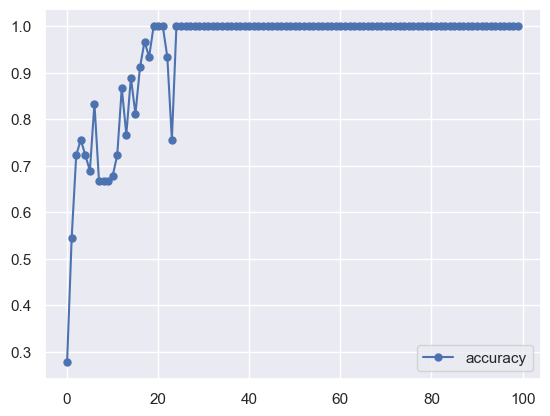

In [68]:
# lr = 0.1
# num_epochs = 100
# act = 'relu'
# num_hidden_units = 512
# bs = 16

# layers = [
#     Dense(units=num_hidden_units, input_shape=(3, ), activation=act),
#     Dense(units=3, activation='softmax'),
# ]


lr = 0.05
num_epochs = 100
act = 'relu'
# act = 'sigmoid'
num_hidden_units = 32
bs = 16

layers = [
    Dense(units=num_hidden_units, input_shape=(3, ), activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=num_hidden_units, activation=act),
    Dense(units=3, activation='softmax'),
]

model = Sequential()
for layer in layers:
    model.add(layer)

model.compile(
    loss="CategoricalCrossentropy",
    metrics=["accuracy"],
    optimizer=SGD(learning_rate=lr),
)

hist = model.fit(
    X,
    y_new,
    epochs=num_epochs,
    batch_size=bs,
)

# 畫出訓練過程
plt.plot(hist.history['accuracy'], ms=5, marker='o', label='accuracy')
plt.legend()
plt.show()

In [76]:
pred_y_array = model.predict(
    [[0, 0, 0]]
).squeeze()

pred_y = pred_y_array.argmax()
print(f"predicted y={pred_y}.")

1/1 [==============================] - 0s 32ms/step
predicted y=0.


In [78]:
pred_y_array.sum()

1.0000001

[回到頂部](#%E7%9B%AE%E6%A8%99%EF%BC%9A)